# Load dataset


In [1]:
import tensorflow as tf
import os

In [2]:
train_dir = "/content/drive/MyDrive/ML_Project/Food_not_food/data/train"
test_dir = "/content/drive/MyDrive/ML_Project/Food_not_food/data/test"
train_dir, test_dir

('/content/drive/MyDrive/ML_Project/Food_not_food/data/train',
 '/content/drive/MyDrive/ML_Project/Food_not_food/data/test')

In [4]:
# Load in data
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
            batch_size=32,
            image_size=(224,224)
            )

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
            batch_size=32,
            image_size=(224,224)
            )

train_data, test_data

Found 49081 files belonging to 2 classes.
Found 12273 files belonging to 2 classes.


(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [5]:
train_data.class_names

['food_images', 'non_food_images']

In [6]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
test_data = test_data.prefetch(tf.data.AUTOTUNE)

# Building the first model to make sure that works well with small dataset

In [7]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Make model untrainable
base_model.trainable = False

# Build a functional model
input_layer = tf.keras.Input(shape=(224,224,3))
x = base_model(input_layer)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Construct model
model_1 = tf.keras.Model(input_layer, output_layer, name="EfficientNetB0-V2")

16719872/16705208 [==============================] - 0s 0us/step


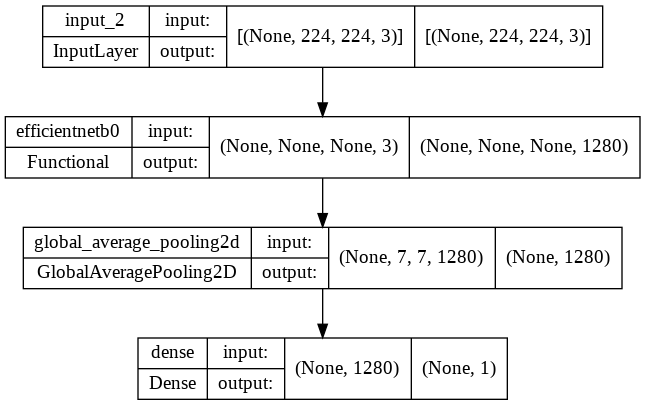

In [8]:
tf.keras.utils.plot_model(model_1, show_shapes=True)

In [ ]:
# Import weight and biases library to plot weights and biases
# !pip install wandb
# import wandb
# run = wandb.init(project="food-not-food application", entity="walter-ng-1906",
#                  config={"epochs":50})

# config = wandb.config 

In [9]:
# Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [10]:
# Create EarlyStopping callback and TensorBoard callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,
                                                  monitor="val_loss")

In [11]:
# Fit model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        callbacks=[early_stopping]) 

Epoch 1/5
1534/1534 [==============================] - 7262s 5s/step - loss: 0.2001 - accuracy: 0.9395
Epoch 2/5
1534/1534 [==============================] - 163s 106ms/step - loss: 0.1642 - accuracy: 0.9497
Epoch 3/5
1534/1534 [==============================] - 150s 98ms/step - loss: 0.1558 - accuracy: 0.9516
Epoch 4/5
1534/1534 [==============================] - 149s 97ms/step - loss: 0.1512 - accuracy: 0.9521
Epoch 5/5
1534/1534 [==============================] - 147s 95ms/step - loss: 0.1482 - accuracy: 0.9524


In [12]:
model_1.evaluate(test_data)

384/384 [==============================] - 1924s 5s/step - loss: 0.1569 - accuracy: 0.9510


[0.15688209235668182, 0.9510307312011719]

# Save Model

In [13]:
model_1.save("/content/drive/MyDrive/ML_Project/Food_not_food/food_not_food_model_B0-V2.h5")

In [14]:
model_1.save("/content/drive/MyDrive/ML_Project/Food_not_food/food_not_food_model_B0-V2")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_Project/Food_not_food/food_not_food_model_B0-V2/assets


## Convert model to TFLite for Deployment

In [ ]:
# Convert the model
saved_model_dir = "/content/drive/MyDrive/ML_Project/Food_not_food/food_not_food_model_B0"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # Path to the SavedModel directory
tflite_model = converter.convert()

# Save the model
with open("/content/drive/MyDrive/ML_Project/Food_not_food/food_not_food_model_B0.tflite","wb") as f:
    f.write(tflite_model)

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/ML_Project/Food_not_food/food_not_food_model_B0-V1.h5')
# Check its architecture
new_model.summary()

Model: "EfficientNetB0-V1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 1,281
Non-trainable params: 4,049,571
_________________________________________________________________
